<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.

**Fecha:**

**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.


# <center> <font color='navy'> COVID-19 en Estados Unidos

> **Objetivos del proyecto**

•	Objetivo General. Buscar predecir el comportamiento del virus en el futuro tomando en cuenta la cantidad de positivos.

•	Objetivo Secundario. Buscar encontrar por medio de la simulación de Montecarlo la probabilidad de recuperarse en caso de ser positivo.

•	Objetivo Secundario. Buscar encontrar por medio de la simulación de Montecarlo la probabilidad de morirse en caso de estar infectado.

•	Objetivo Secundario. Buscar encontrar la posibilidad de ser hospitalizado en caso de ser infectado.

> **Definición del Problema**  

El COVID-19 es una enfermedad conocida como coronavirus que ha afectado el mundo entero en cuestión de meses, el primer brote se produjo en Wuhan en diciembre de 2019.
En este proyecto buscaremos modelar y simular diferentes variables que van relacionadas con este virus con los datos de Estados Unidos por lo cual nuestro modelo final solo podrá predecir el comportamiento del virus en este país.  


> **Escenarios a simular**

Los nodos o escenarios que elegimos para simular son el número de casos positivos, número de personas recuperadas, número de personas hospitalizadas y el número de fallecidos.  

Elegimos estos nodos debido a que nos parece importante predecir el comportamiento del COVID-19, y estos datos los consideramos los más representativos. Los positivos debido a que son la cantidad de personas infectadas, el número de recuperadas para poder analizar qué porcentaje de los casos positivos logran superar el virus, las hospitalizadas que representan las personas que están recibiendo atención médica lo que significa que se encuentran en una situación grave y por último el número de fallecidos que nos indica la mortalidad del virus.

> **Diagrama**

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://lh3.googleusercontent.com/pfqqZ9d9QJ88tm7E_pE5pKJGIPVM8IdqKjyfSrV5_KzdEPkzaPun-eaxh-h7xNcjHyVEmgH4zW3Q5xzdM7CdbvQjEzbeb_rteIdBjjZ18VP3zt9oQ8odjKarO-IW_HSERLbiTdVZ1E3c6KspB_vhv2jUA6ComDppPV__K5C0oogzIT8jtLykrfCpirVn1s6fJUt0QGs_W4Fy3yN7s-x5QFsYBNoCSB4SniQanNh8eC-tOw1WiJUut33JxpoShFC2qNH6R3BYNTsmwcfOLK6s6zvN6g6jDmdc8ucJR4t7_jRGonWZmiPDE7-o_jUuuULIzcDEM5-R8XQbnz_5Y8b_hcSnmqNUCBNM61gkX5F5VNlw8utNjs272tNgY__fn9uOUxL6MJUphB2mLTQ0pRiH9WnjgmrCsJ4nCtwvvcahdPhGQWqRieI6BqU9n9tpDDJds2G2EF5dwGq6OBgYY9-H-VosU_CedPLeOrlfS3wYg5scBOG9NuMoq9bh4rMdF_hnQLfueE8GmQHEsciXlTiWPDaevylXgMHE7xz1YEC8tcIOefIlMaSmnKRq63Ewz-XjEanlDGyOjfEmDYNRZfwsT4AtD6S4J1OjhBG9fLmz1sTQPsVusCQLYxOuhfxD3G91I8Zk8pRmtWuI0l55xQESAt4Ge-OrtDW89V1kukTKcVpblJ8dwRjTJnyph7wc=w644-h778-no?authuser=0" width="550" height="550" /> 


> **Supuestos**

•	El modelo a realizar únicamente es funcional si y solo sí se predicen o interpretan información o datos para Estados Unidos.  

•	Se va a tomar como el día más reciente el último dato que tiene el dataframe que es la información actualizada al día 249 del año 2020.

•	Las variables a modelar son las más significativas para predecir la información más importante del impacto del virus y su comportamiento.


> **Hipotesis**

In [1]:
# Importacion de todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize

## Base de Datos

In [41]:
# Lectura de Data Frame
data = pd.read_csv('us_covid19_daily.csv')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200927,56,7080459,90648092,11136.0,29432.0,404083.0,6080.0,20049.0,1511.0,...,101298794,2020-09-27T00:00:00Z,0,0,307,758,665609,35289,806258,e7c64e674bfc2af02802153452e53628d44c241c
1,20200926,56,7045170,89982483,11183.0,29554.0,403325.0,6057.0,20002.0,1509.0,...,100492536,2020-09-26T00:00:00Z,0,0,866,1154,886140,47733,1004261,e98f5076c72de4a27a283d22756b7d0b9a44d41f
2,20200925,56,6997437,89096343,10905.0,29769.0,402171.0,6133.0,19919.0,1506.0,...,99488275,2020-09-25T00:00:00Z,0,0,844,1331,856519,55526,1011675,8d311e73fe038522a1a6be4bc3202de206ec0adb
3,20200924,56,6941911,88239824,12008.0,30043.0,400840.0,6168.0,19555.0,1560.0,...,98476600,2020-09-24T00:00:00Z,0,0,921,1588,823449,43772,940353,375a88dd29991abc1946cd7f98f4f20a9e37fb5d
4,20200923,56,6898139,87416375,10535.0,29905.0,399252.0,6113.0,19452.0,1544.0,...,97536247,2020-09-23T00:00:00Z,0,0,1157,1451,800878,38567,923704,b4fe7067370631b26f8e988fd2524b5691235a09


## Limpieza de datos

In [42]:
clean_data = pd.DataFrame()
# Filtrar las variables a analizar
clean_data['positives'] = data.T.loc['positive']
clean_data['recovered'] = data.T.loc['recovered']
clean_data['hospitalized'] = data.T.loc['hospitalizedCurrently']
clean_data['death'] = data.T.loc['death']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['death']))]
clean_data.set_index('index', inplace = True)
# Llenar valores nulos con ceros
clean_data.fillna(0, inplace = True)
# Mostrar la cola del data frame
clean_data

,positives,recovered,hospitalized,death
index,,,,
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0
...,...,...,...,...
245,6898139,2672338.0,29905.0,193931.0
246,6941911,2710183.0,30043.0,194852.0
247,6997437,2727335.0,29769.0,195696.0


# Analisis inicial de datos

The mean of positives data in USA is 2336213.772
The variance of positives data in USA is 2292372.2932224027


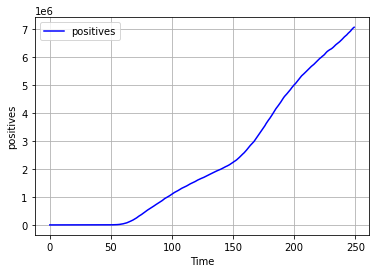

The mean of recovered data in USA is 756653.328
The variance of recovered data in USA is 861485.7768200033


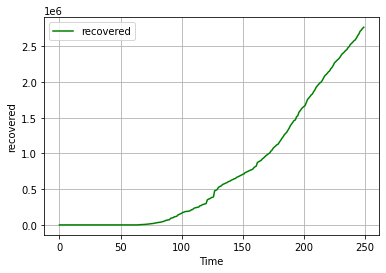

The mean of hospitalized data in USA is 30959.568
The variance of hospitalized data in USA is 20736.197725460082


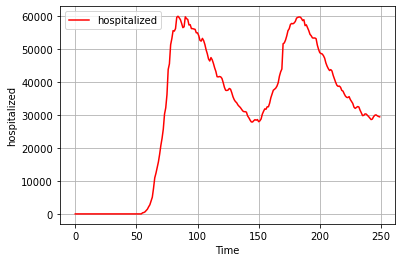

The mean of death data in USA is 84069.96
The variance of death data in USA is 68046.3522862938


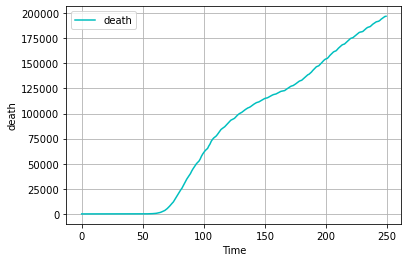

In [43]:
# Plotear los datos que tenemos individualmente para poder analizar cada uno por separado
color_index = 0
colors = "bgrcmykw"
# plotear cada uno
for i in range(len([c for c in clean_data])):
    plt.plot(clean_data.iloc[:,i],label = [c for c in clean_data][i], c = colors[color_index])
    print('The mean of', [c for c in clean_data][i], 'data in USA is', np.array(clean_data.iloc[:,i]).mean())
    print('The variance of', [c for c in clean_data][i], 'data in USA is', np.array(clean_data.iloc[:,i]).std())
    color_index += 1
    plt.xlabel('Time')
    plt.ylabel([c for c in clean_data][i])
    plt.legend()
    plt.grid()
    plt.show()

In [44]:
# comentar las graficas y los datos

## <center> <font color='navy'> Simulacion de Montecarlo <center> <font color='navy'>

Pasos para la simulacion de datos

- Estimar f
- Aplicar metodos de generacion de variables aleatorias
    * Aplicar tecnicas de reduccion de varianza
* Obtener distribucion de probabilidad
* Aplicar Montecarlo


## Simulacion para escenario 1: **Positivos**

In [45]:
# nombrar variable que contenga datos del df determinados
positivos = clean_data['positives']

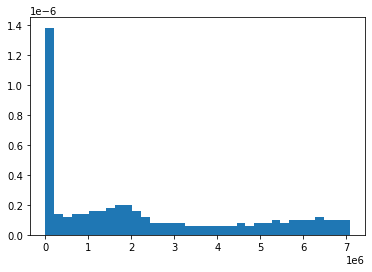

In [46]:
# plotear histograma de los datos
plt.hist(positivos,bins = 35, density = True );

### Estimacion de la f para el metodo de la transformada inversa por medio de la comprobacion de distribucion de probabilidad 

El error de la distribucion beta es de 7.372500151086386e-08
El error de la distribucion expon es de 8.579957497076476e-08
El error de la distribucion exponnorm es de 8.573057801273353e-08
El error de la distribucion laplace es de 8.245061512646723e-08
El error de la distribucion lognorm es de 1.3705765525942237e-07
El error de la distribucion norm es de 8.128119521771313e-08
El error de la distribucion uniform es de 8.248052845161591e-08


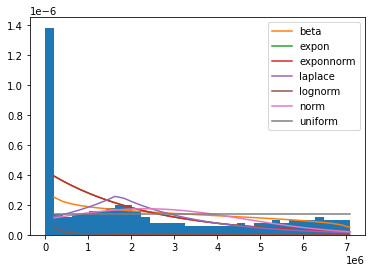

In [47]:
data = positivos

# Probar diferentes distirbuciones de probabilidad
dist_list = [ 'beta','expon', 'exponnorm', 'laplace', 'lognorm','norm','uniform']

y_real, x_real,  _ = plt.hist(data, bins = 35, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)).mean())
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()


Podemos notar que la distribucion que menor error tuvo fue la de la distribucion exponencial, con un error de 8.244588197395501e-08, procederemos a hacer una prueba de Q-Q para comprobar que la distribucion que tenemos es exponencial.

Aplicando como hipotesis iniciales que:

* H0: El conjunto de datos distribuye como una funcion de distribucion exponencial
* H1: El conjunto de datos distribuye como cualquier otra distribucion de probabilidad

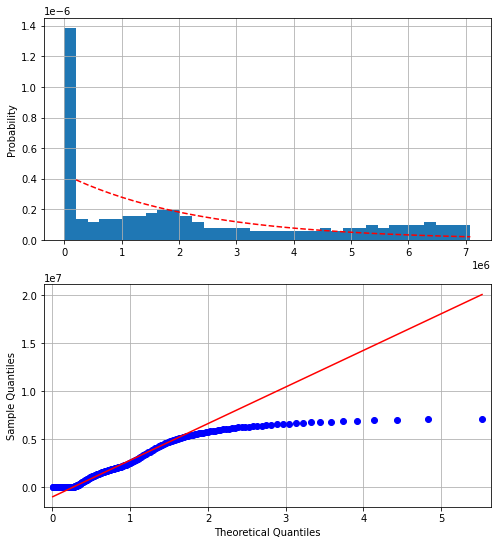

In [48]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 35, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'expon'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])


**Conclusion**

Podemos observar que los datos reales hasta el quantil 2 si se ajustan pero posteriormente de este quantil los datos no se ajustan de ninguna manera, a pesar de que fue la distribucion de probabilidad que mejor se ajusto de las probadas anteriormente, el error al hacer una prediccion con estos seria enorme. **Se rechaza H0**.

Por lo cual la distribucion exponencial no es aceptable para modelar este conjunto de datos, asi que se procedera a encontrar una f con Kernel Density Estimation

### Estimacion de la f para el metodo de aceptacion rechazo con Kernel Density Estimation

In [49]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


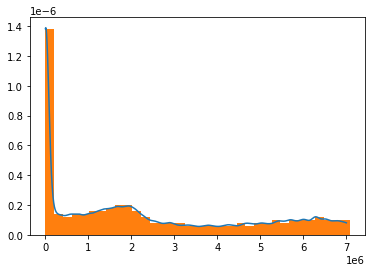

In [91]:
func_positivos = kde_statsmodels_mf(positivos)
x_g = np.arange(0,7e6,100)
plt.figure()
plt.plot(x_g,func_positivos(x_g));
plt.hist(positivos,bins = 35, density = True);
plt.show()

Claramente podemos observar que la funcion especificamente creada para los datos si se acerca a la distribucion de datos generada, por lo cual se procedera a comprobar el error cuadratico medio que genera esta funcion sobre los datos reales a comparacion de la funcion obtenida por comprobacion de distribucion

### Metodo de aceptacion rechazo con KDE

Procedemos a aplicar el metodo de aceptacion rechazo con la funcion obtenida por KDE

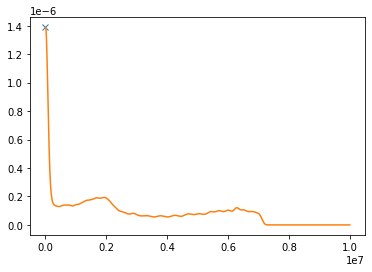

In [92]:
# la funcion obtenenida por kde es la siguiente
f = func_positivos
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,10e6,100)
max_fp = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fp,'x',lw = 10)
plt.plot(x,func_positivos(x))

#### Generacion de variables aleatorias montecarlo crudo

In [93]:
def acep_rechazo_positivos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,8e6,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_positivos # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_p = acep_rechazo_positivos(f,max_fp,N)
len(var_aleatorias_montecarlo_p)

1000

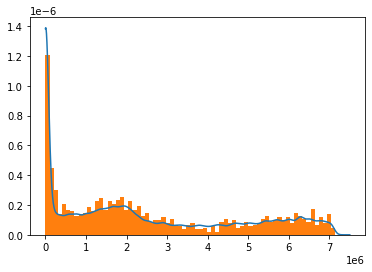

In [94]:
x = np.arange(0,7.5e6,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_p,bins = 70, density = True);
plt.show()

#### Generacion de variables aleatorias por medio de reduccion de varianza 

Nota: El hecho de utilizar tecnicas de reduccion de varianza no tendria sentido a la hora de utilizar el metodo de aceptacion rechazo, debido a que, como el metodo se basa en generar variables por medio del metodo de prueba y error, es decir, algunas variables aleatorias generadas las toma y otras no, dependiendo de si estan dentro de f(x), por lo cual, el numero y rango de las variables aleatorias que si toma depende de la aleatoriedad de los datos, mientras que los dos metodos de reduccion de varianza (numeros complementarias y estratificado) necesitan una cantidad definida de N variables a generar para estratificar la muestra, asi que no tiene sentido juntar ambos metodos por las siguientes razones:

* Al ser el metodo de aceptacion rechazo dependiente de la cantidad que acepte y/o no acepte, no se puede definir una N de variables que se generaran para probar, cosa que necesitan los metodos de reduccion de varianza.
* Suponiendo que se aplique el metodo hay cierto grado de posibilidad de que se acepte ciertas variables en un rango y en otro no, cosa que podria causar un sesgo en los resultados y ocasionando que las variables no necesariamente distribuyan como la f(x)

Conclusion: Si bien las tecnicas de reduccion de varianza son muy utiles y optimas para el caso en el cual generes variables aleatorias por medio del metodo de la transformada inversa, no es tan util para utilizar con el metdoo de aceptacion y rechazo.

#### Montecarlo y media de los datos

In [99]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_montecarlo_p
N = 10**5
confianza = 0.95
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_positivos = np.mean(X)
print('Con una confianza de %2.2f la media del numero de positivos estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de positivos estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de positivos' ,media_positivos)

Con una confianza de 0.95 la media del numero de positivos estará en el intervalo t,
 (2451367.442686682, 2729240.7539140373)
Con una confianza de 0.95 la media del numero de positivos estará en el intervalo normal,
 (2451535.7715189615, 2729072.425081758)
Media calculada del numero de positivos 2590304.0983003597


## Simulacion para escenario 2: **Hospitalizados**

## Simulacion para escenario 3: **Recuperados**

## Simulacion para escenario 4: **Muertos**

## <center> <font color='navy'> Conclusion <center> <font color='navy'>